## MTH9899 Machine Learning 
### Assignment 3
#### Name: ShengQuan Zhou

In class, we went through the details of manually calculating backprop on a
simple network. For this question, we’re going to do backpropagation using numpy,
and no 3rd party packages. The goal is to train a simple network with 2 input features
and 1 hidden layer with 3 nodes. The hidden layer uses a sigmoid
activation function and the output layer users a linear activation function. 
For loss, please use mean squared error (MSE). Below is a picture
of the network and a listing of code to generate sample and test data. Please train
your network on 50,000 input rows in a single training batch. Graph the loss function
vs the iteration. Repeat this graph using different values of $\eta$, the learning rate. How
does this affect the loss?

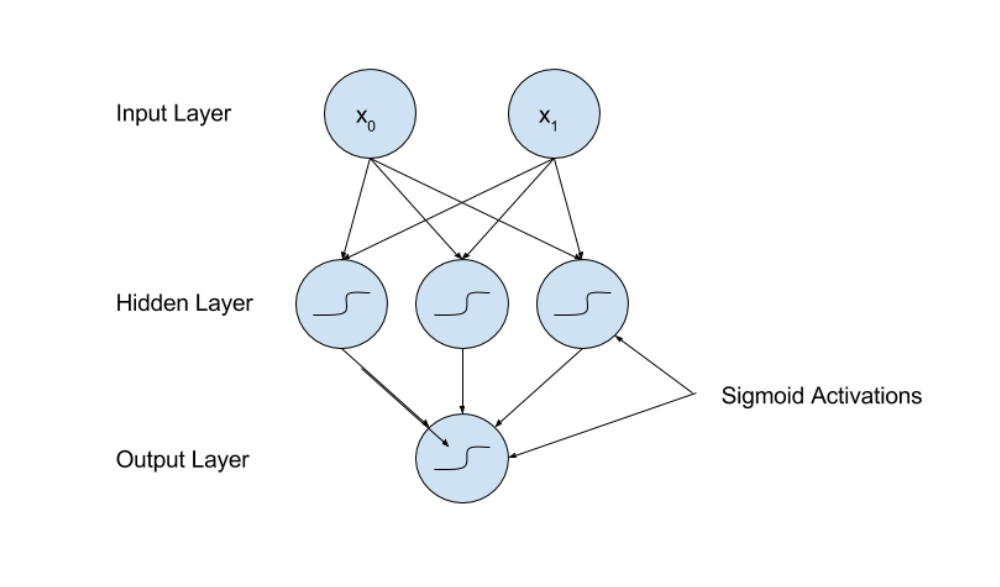

In [248]:
from IPython.display import Image
Image("./BackpropDemo.png")

#### Input layer to pre-hidden layer
$$
f_j = \sum_{i=1}^2 w_{ij}x_i + b_j, \quad j=1,2,3.
$$
#### Pre-hidden layer to hidden layer
$$
h_j = A\left(f_j\right) = A\left( \sum_{i=1}^2 w_{ij}x_i + b_j \right), \quad j=1,2,3,
$$
where $A(\cdot)$ is a sigmoid activation function used by the hidden layer.
#### Hidden layer to pre-output
$$
g = \sum_{j=1}^3 w'_j h_j + b'
$$
#### Pre-output to output
$$
\hat{y} = A'(g) = A'\left(\sum_{j=1}^3 w'_j h_j + b'\right) =  A'\left(\sum_{j=1}^3 w'_j A\left( \sum_{i=1}^2 w_{ij}x_i + b_j \right) + b'\right),
$$
where $A'(\cdot)$ is an activation function used by the output layer. **In this exercise, it is assumed to be identity**.
#### Loss function (MSE)
$$
E = \frac{1}{2N}\sum_{l=1}^N (\hat{y}^l - y^l)^2,
$$
where we have used the superscript $l$ to denote index of data rows.
#### Derivatives chain
\begin{align}
\frac{\partial E}{\partial w_j'} &= \frac{1}{N}\sum _ {l=1}^N(\hat{y} ^ l - y^l)\frac{\partial \hat{y} ^ l}{\partial w_j'} = \frac{1}{N}\sum _ {l=1}^N(\hat{y} ^ l - y^l)\frac{\partial A'}{\partial g^l}\frac{\partial g^l}{\partial w_j'}= \frac{1}{N}\sum _ {l=1}^N(\hat{y} ^ l - y^l)\frac{\partial A'}{\partial g^l}h_j^l,\quad j=1,2,3,\\
\frac{\partial E}{\partial b'} &= \frac{1}{N}\sum _ {l=1}^N(\hat{y} ^ l - y^l)\frac{\partial \hat{y} ^ l}{\partial b'} = \frac{1}{N}\sum _ {l=1}^N(\hat{y} ^ l - y^l)\frac{\partial A'}{\partial g^l}\frac{\partial g^l}{\partial b'}= \frac{1}{N}\sum _ {l=1}^N(\hat{y} ^ l - y^l)\frac{\partial A'}{\partial g^l},\\
\frac{\partial E}{\partial w _ {ij}} &= \frac{1}{N}\sum _ {l=1}^N(\hat{y} ^ l - y^l)\frac{\partial \hat{y} ^ l}{\partial w _ {ij}}  = \frac{1}{N}\sum _ {l=1}^N(\hat{y} ^ l - y^l)\frac{\partial A'}{\partial g^l}\frac{\partial g^l}{\partial w _ {ij}} = \frac{1}{N}\sum _ {l=1}^N(\hat{y} ^ l - y^l)\frac{\partial A'}{\partial g^l}w_j'\frac{\partial h_j^l}{\partial w _ {ij}} = \frac{1}{N}\sum _ {l=1}^N(\hat{y} ^ l - y^l)\frac{\partial A'}{\partial g^l} w_j'\frac{\partial A}{\partial f_j^l} x_i^l , \, i=1,2;j=1,2,3,\\
\frac{\partial E}{\partial b _ {j}} &= \frac{1}{N}\sum _ {l=1}^N(\hat{y} ^ l - y^l)\frac{\partial \hat{y} ^ l}{\partial b _ {j}}  = \frac{1}{N}\sum _ {l=1}^N(\hat{y} ^ l - y^l)\frac{\partial A'}{\partial g^l}\frac{\partial g^l}{\partial b _ {j}} = \frac{1}{N}\sum _ {l=1}^N(\hat{y} ^ l - y^l)\frac{\partial A'}{\partial g^l}w_j'\frac{\partial h_j^l}{\partial b _ {j}} = \frac{1}{N}\sum _ {l=1}^N(\hat{y} ^ l - y^l)\frac{\partial A'}{\partial g^l} w_j'\frac{\partial A}{\partial f_j^l}, \, j=1,2,3,\\
\end{align}

#### Symbolic Form
(The following symbols $\odot$ are for book-keeping purposes only. Please do not read them literally.)
\begin{align}
\frac{\partial E}{\partial w'} &= (\hat{Y}-Y)\odot \partial A'(\text{Pre-output}) \odot (\text{Post-hidden})\\
\frac{\partial E}{\partial b'} &= (\hat{Y}-Y)\odot \partial A'(\text{Pre-output}) \\
\frac{\partial E}{\partial w} &= (\hat{Y}-Y)\odot \partial A'(\text{Pre-output}) \odot \partial A(\text{Pre-hidden}) \odot w' \odot X\\
\frac{\partial E}{\partial b} &= (\hat{Y}-Y)\odot \partial A'(\text{Pre-output}) \odot \partial A(\text{Pre-hidden}) \odot w'
\end{align}

#### Assume the output layer is linear 
$A'(\cdot)$  is identity, $\partial A'(\cdot)\equiv 1$.
\begin{align}
\frac{\partial E}{\partial w'} &= (\hat{Y}-Y)\odot (\text{Post-hidden})\\
\frac{\partial E}{\partial b'} &= (\hat{Y}-Y) \\
\frac{\partial E}{\partial w} &= (\hat{Y}-Y) \odot \partial A(\text{Pre-hidden}) \odot w' \odot X\\
\frac{\partial E}{\partial b} &= (\hat{Y}-Y) \odot \partial A(\text{Pre-hidden}) \odot w'
\end{align}

In [249]:
import numpy as np
import time
from mpl_toolkits.mplot3d import Axes3D

In [250]:
sigmoid = lambda x: 1/(1+np.exp(-x))
dsigmoid = lambda x: sigmoid(x) * (1-sigmoid(x))

In [251]:
# Remove this line if you want to try different initial conditions
np.random.seed(0)

In [252]:
def get_test_data(num_pts):
    centers = [(0,0,1), (1,1,-1), (1,-1,1), (-2,0,-1), (4,1,1)]
    
    F = 2
    X = np.random.rand(num_pts, F)*10-5
    
    def get_y(x):
        distances = [np.sqrt(np.sum((x-c[:2])**2)) for c in centers]
        which = np.argmin(distances)
        return centers[which][2]*distances[which]
    
    Y = np.array([get_y(x) for x in X])
    return X,Y

In [253]:
# Number of input features
F = 2 
# Number of nodes in hidden layer
M = 3
# Random initialization of weights from input features to hidden layer
w1 = np.random.rand(F, M)-0.5
# Random initialization of bias from input features to hidden layer
b1 = np.random.rand(M)-0.5
# Random initialization of weights from hidden layer to output
w2 = np.random.rand(M)-0.5
# Random initialization of bias from hidden layer to output
b2 = np.random.rand()-0.5

In [254]:
def run(X, Y, w1, b1, w2, b2, num_epoch, eta):
    """
        Parameters:
        -----------
        X: N-by-F input matrix, training data of independent variables
        Y: N-by-1 input vector, training data of dependent variables
        w1: F-by-M matrix, initial weights from input features to hidden layer
        b1: M-by-1 vector, initial biases from input features to hidden layer
        w2: M-by-1 matrix, initial weights from hidden layer to output
        b2: scalar, initial bias from hidden layer to output
        num_epoch: number of iterations to perform for gradient descents
        eta: learning rate
    
        Return:
        -------
        losses: MSE losses over iterations
        w1p: F-by-M matrix, optimized weights from input features to hidden layer
        b1p: M-by-1 vector, optimized biases from input features to hidden layer
        w2p: M-by-1 matrix, optimized weights from hidden layer to output
        b2p: scalar, optimized bias from hidden layer to output
    """
    losses = [] # MSE losses over iterations
    N = len(Y) # Number of sample points
    
    w1p = w1 # Initialize w1
    b1p = b1 # Initialize b1
    w2p = w2 # Initialize w2
    b2p = b2 # Initialize b2
    
    for i in range(num_epoch):
        pre_hidden = X.dot(w1p) + b1p # N-by-M matrix
        post_hidden = sigmoid(pre_hidden) # N-by-M matrix, element-wise activated
        # If the output layer has a non-trivial activation function,
        # we need pre_output and post_output, element-wise activated.
        output = post_hidden.dot(w2p) + b2p # N-by-1 vector
        loss = 0.5*np.sum((output - Y)**2)/N # MSE estimate, scalar
        losses.append(loss)

        dy = output - Y # Deviation of estimated output
        dy_dA_df_w2 = (dsigmoid(pre_hidden).T * dy).T * w2
        
        dloss_dw2 = (post_hidden.T).dot(dy)/N
        dloss_db2 = np.sum(dy)/N
        dloss_db1 = np.sum(dy_dA_df_w2, 0)/N
        dloss_dw1 = (X.T).dot(dy_dA_df_w2)/N
            
        w1p = w1p - eta * dloss_dw1
        b1p = b1p - eta * dloss_db1
        w2p = w2p - eta * dloss_dw2
        b2p = b2p - eta * dloss_db2
    
    return losses, w1p, b1p, w2p, b2p

In [255]:
# Number of data rows
N = 50000
# Generate sample data
xall, yall = get_test_data(N)

In [256]:
# Run backpropagation with learning rate eta = 0.1, 0.5, 1.0, 1.055.
# When eta takes larger values until it's too large, the convergence gets faster;
# When eta exceeds a critical value in magnitude, no convergence is obtained.
losses_01,_,_,_,_ = run(xall, yall, w1, b1, w2, b2, 100, 0.1)
losses_05,_,_,_,_ = run(xall, yall, w1, b1, w2, b2, 100, 0.5)
losses_1,_,_,_,_ = run(xall, yall, w1, b1, w2, b2, 100, 1.0)
losses_not_converge,_,_,_,_ = run(xall, yall, w1, b1, w2, b2, 100, 1.055)

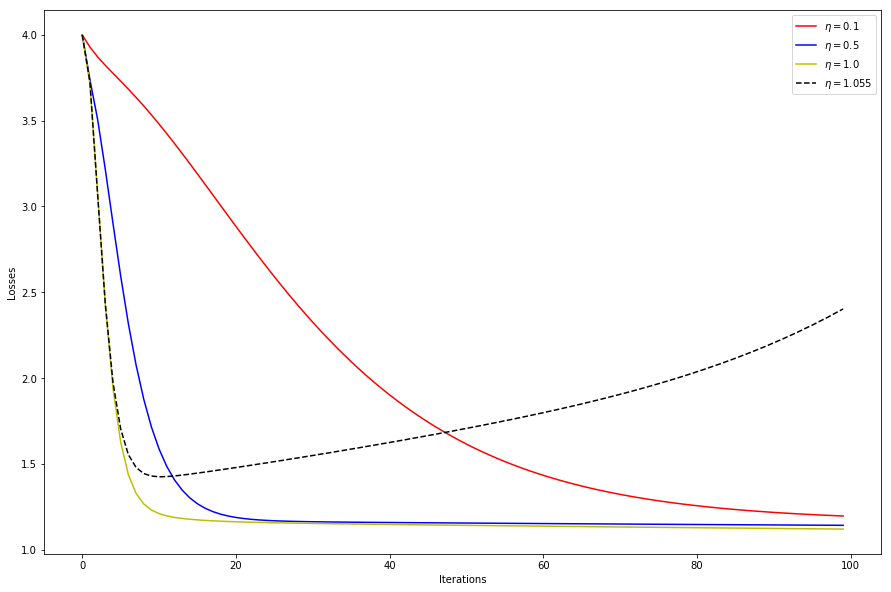

In [257]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
line1, = plt.plot(losses_01, 'r-', label='$\eta=0.1$')
line2, = plt.plot(losses_05, 'b-', label='$\eta=0.5$')
line3, = plt.plot(losses_1, 'y-', label='$\eta=1.0$')
line4, = plt.plot(losses_not_converge, 'k--', label='$\eta=1.055$')
plt.ylabel('Losses')
plt.xlabel('Iterations')
plt.legend(handles=[line1, line2, line3, line4])
plt.show()

### Comment
- Generally, higher learning rate $\eta$ leads to faster convergence to the optimized MSE losses, as long as the learning rate does not exceed some threshold value, above which the convergence is broken. See the red, blue, yellow lines in the above chart, corresponding to $\eta=0.1,0.5,1.0$.
- When the learning rate $\eta$ gets too high and exceeds a critical value, in our case, the critical threshould is about $\eta^{\star}\approx 1.05$, the convergence is broken and the losses diverge to infinity as iterations continue. See the black dashed line in the above chart, corresponding to $\eta=1.055$.
- The reason why too high a value of the learning rate does NOT lead to convergence is that the optimizer is taking such a large step in searcing the parameter space that it never settles down to any local optimal point.